 # 개요
    
 신경망 학습에서의 학습은 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻한다. 이번 챕터에서 신경망이 학습할 수 있도록 해주는 지표인 손실 함수를 소개한다. 이 손실 함수의 결과값을 가장 적게 만드는 가중치 매개변수를 찾는 것이 학습의 목표입니다. 이번 챕터에서는 손실 함수의 값을 가급적 작게 만드는 기법으로 함수의 기울기를 활용하는 경사법을 소개한다.
 
여기서 손실함수란 신경망이 학습할 수 있도록 해주는 지표로서 사용자가 원하는 출력과 머신러닝 모델 출력 값의 차이, 즉 오차를 말한다. 일반적으로 손실 함수 값이 최소화되도록 하는 가중치와 편향을 찾는 것이 학습니다.

p.s 이 챕터 관련 정보 출처: https://kolikim.tistory.com/36?category=733477 

# 1.데이터 주도 학습
 
 머신러닝이란 데이터에서 정답을 찾고 패턴을 발견하는 것이다 따라서 데이터가 없으면 아무것도 시작되지 않는다. 보통 데이터에서 어떠한 패턴을 찾아야할 때 사람은 직관과 경험을 토대로 시행착오를 거친다. 그러나 머신러닝에서는 사람의 개입을 최소화하고 수집한 데이터로부터 패턴을 찾으려고 시도한다. 더욱 딥러닝은 아래 그림과 같이 기존 머신러닝에서 사용하던 방법보다 사람의 개입을 최소화할 수 있는 중요한 특징을 가지고 있다.
 
 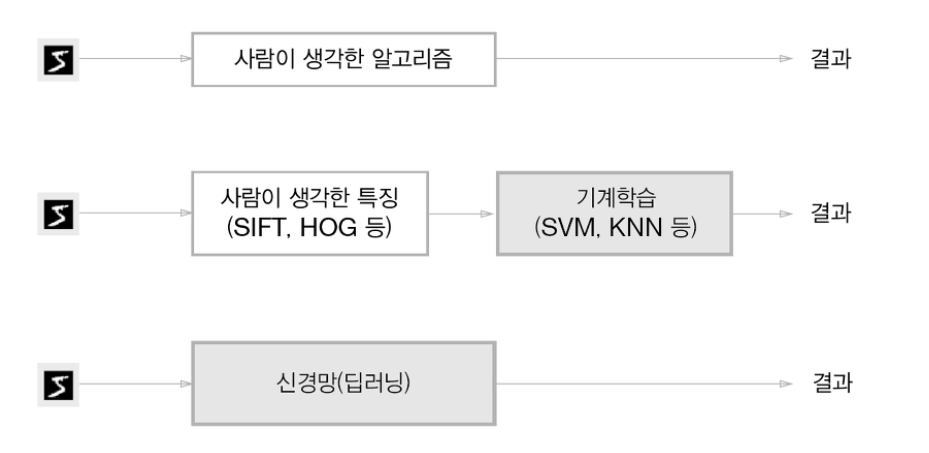

 머신러닝의 학습 알고리즘들이 모든 것을 해결해 줄 수 없다. 이들은 모아진 데이터로부터 규칙을 찾아내는 역할을 하지만 원본 데이터에서 중요한 데이터(특징)만을 뽑아내는 것은 사람이 해야하는 일이다. 특히 문제에 적합한 특징을 쓰지 않으면 좋은 학습 알고리즘을 이용하더라도 좋은 결과를 얻을 수 없다 그러나 딥러닝(신경망)은 데이터를 있는 그대로 학습한다. 원본 데이터에 포함된 중요한 특징까지도 기계가 스스로 학습하는 것이다. 세부사항과 관계없이 신경망은 주어진 데이터를 온전히 학습하고 주어진 문제의 패턴을 발견하려고 시도한다. 즉 신경망은 모든 문제를 주어진 데이터 그대로를 입력 데이터로 활용해 end-to-end로 학습할 수 있다.
 
※ end-to-ed 학습: 사람이 중간 과정을 만들 필요가 없는 학습을 말한다. 즉 입력데이터와 출력 데이터만을 이용해 컴퓨터가 알아서 특징을 만드는 시스템이다. 하지만 end-to-end 학습을 하려면 데이터가 많아야 한다.

# 2.손실 함수

여기서 손실함수란 신경망이 학습할 수 있도록 해주는 지표로서 사용자가 원하는 출력과 머신러닝 모델 출력 값의 차이, 즉 오차를 말한다. 일반적으로 손실 함수 값이 최소화되도록 하는 가중치와 편향을 찾는 것이 학습니다. 일반적으로 평균 제곱 오차와 교차 엔트로피 오차를 사용한다.

즉 손실함수는 신경망 성능의 나쁨을 나타내는 지표다.

 - 평균 제곱 오차 (MSE)
 
계산이 간편하여 가장 많이 쓰이는 손실함수로 모델의 출력값과 사용자가 원하는 출력 값 사이의 거리 차이를 오차로 사용한다. 이때 거리차이를 단순히 합산하면 오차가 줄어드므로 거리차이를 제곱한뒤 합산한 후 평균을 내는 것이다. 아래 그림에서는 1/2로 곱하였으나 실제로는 1/n을 곱해주어야 한다.

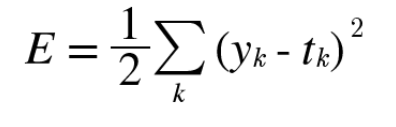

In [2]:
# 평균 제곱 오차 예제
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답은 2

# 예1: 2일 확률이 높다고 추정 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
# 예2 : 7일 확률이 높다고 추정 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

# 즉 MSE가 낮을 수록 정답에 더 가까운 것으로 판단할 수 있다.

0.5975

 - 교차 엔트로피 오차 (CEE)
 
 교차 엔트로피 오차는 기본적으로 분류 문제에서 원-핫 인코딩 했을 경우에만 사용할 수 있는 오차 계산법이다. 아래 식에서 t값이 원-핫 인코딩된 벡터이고, 거기에 모델의 출력 값에 자연로그를 취한 것이 곱해는 형태이다. 결과적으로 교차 엔트로피 오차는 정답일 때의 모델 값에 자연로그를 계산하는 식이 된다. 즉 정답에 멀어질수록 큰 패널티가 부여 받는 방식.

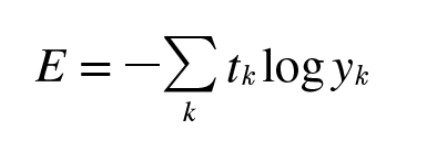
 

In [8]:
# 교차 엔트로피 구현
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답은 2

# 예1: 2일 확률이 높다고 추정 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [7]:
# 예2 : 7일 확률이 높다고 추정 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

 - 미니배치 학습
 
 기계학습 문제는 훈련 데이터를 사용해 학습한다. 구체적으로 말하면 훈련 데이터에 대한 손실 함수 값을 구하고 그 값을 최대한 줄여주는 매개변수를 찾아낸다. 이렇게 하려면 모든 훈련 데이터를 대상으로 손실 함수의 값을 구해야한다. 이제 훈련 데이터 모두에 대한 손실함수의 합을 구하는 방법을 알아보자. 아래의 그림은 교차 엔트로피의 합을 구한뒤 N으로 나눔으로써 평균 손실 함수를 구하는 것이다.
 
 미니배치는 MNIST를 예를 들자면 6만개의 훈련데이터 중 100장을 무작위로 뽑아 그 100장만을 사용하여 학습하는 것을 말하며 이러한 학습법을 미니배치 학습이라 한다.

In [27]:
# 미니 배치 학습
import tensorflow as tf
import numpy as np

# MNIST 데이터 다운
(x_train, t_train), (x_test, t_test) = tf.keras.datasets.mnist.load_data()

In [28]:
print(x_train.shape) # (60000, 28, 28)
print(t_train.shape) # (60000,)
print(x_test.shape)
print(t_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [31]:
# 훈련 데이터에서 무작위 10개만 빼내기
train_size = x_train.shape[0]
batch_size = 10
# np.random.choice() 지정한 범위 수 중에서 무작위로 원하는 갯수만 꺼냄
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [32]:
# np.random.choic 활용
np.random.choice(60000, 10)

array([ 5612,  4341, 51076, 34580,  6824, 31333, 57665, 44357, 51736,
        8345])

In [35]:
# (배치용) 교차 엔트로피 오차 구현하기
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size


In [36]:
# 정답 레이블이 원-핫 인코딩이 아닌 2나 7과 같이 숫자 레이블로 주어졌을 때 교차 엔트로피 오차를 구하는 교차 엔트로피 오차
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t_size)
        y = y.reshape(1, y_size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

 # 3. 수치 미분
 
 경사법에서는 기울기(경사) 값을 기준으로 나아갈 방향을 정한다 기울기란 무엇인지, 또 어떠한 성질이 있는지 앞서 미분을 구현하자

In [1]:
# 미분 파이썬에서 구현하기
# 나쁜 구현의 예
def numerical_diff(f, x):
    h = 10e-50 # 파이썬에서 반올림 오차 문제 발생
    return (f(x+h) - f(x)/ h)

In [2]:
# 중심 차분 혹은 중앙 차분으로 구현한 수치미분
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

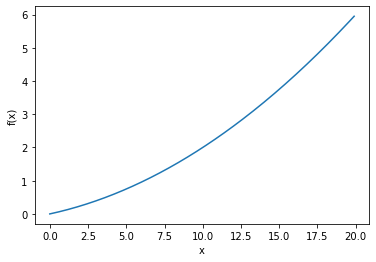

In [4]:
# 수치 미분의 예
def function_1(x):
    return 0.01*x**2 + 0.1*x

# 이 함수를 그려보자
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 생성 (20은 미포함)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [6]:
# 위 함수를 미분하자
numerical_diff(function_1, 5) # 0.1999999999990898
numerical_diff(function_1, 10) 

0.2999999999986347

 - 편미분
    
변수가 2개 이상일 대 어느 한쪽 변수에 집중하고 나머지 변수를 고정시켜 미분하ㅏ는 것을 말한다.

In [8]:
# 편미분 구현
def function_2(x):
    return x[0]**2 + x[1]**2 # 또는 return np.sum(x**2)

# 문제 1 x[0] =3, x[1] = 4일때 x[0]에 대한 편미분을 구하라
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [9]:
# 문제 2 x[0] =3, x[1] = 4일때 x[1]에 대한 편미분을 구하라
def function_tmp2(x1):
    return 3**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

 # 4.기울기
    

앞 절의 예에서 x0와 x1의 편미분을 변수별로 따로 계산했는데 x0와 x1의 편미분을 동시에 계산하고 싶다면 어떻게 해야할까. x0 =3 , x1 = 4일때 (x0,x1) 양쪽의 편미분을 묶어서 계산한다고 했을 때 이때와 같이 모든 변수의 편미분을 벡터로 정리한 것을 기울기라고 한다. 기울기는 아래와 같이 구현할 수 있다.

In [14]:
def numerical_gradient(f,x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h # f(x+h) 계산
        fxh1 = f(x)
        
        x[idx] = tmp_val - h # f(x-h) 계산
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [13]:
# 예로 활용
numerical_gradient(function_2, np.array([3.0,4.0])) # array([6., 8.])
numerical_gradient(function_2, np.array([0.0,2.0])) # array([0., 4.])
numerical_gradient(function_2, np.array([3.0,0.0]))

array([6., 0.])

 - 경사법 (경사하강법)
    
 경사법이란 기울기를 이용하여 함수의 최솟값을 찾는 방법이다. 단 함수가 극소값, 최솟값, 또 안장점이 되는 장소에서 기울기가 0이라는 것. 극소값은 국소적인 최솟값이고, 안장점은 한 방향에서 보면 극대값이고 다른 방향에서 보면 극소값이 되는 점이다.
    
 즉 경사하강법은 기울기가 0인 장소를 찾지만 그것이 최솟값인지 극소값인지, 안장점인지 모른다.
 
경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동, 거기서 또 기울기를 구하고 이동, 또 기울기를 구하고 이동을 반복하는 방법이다.

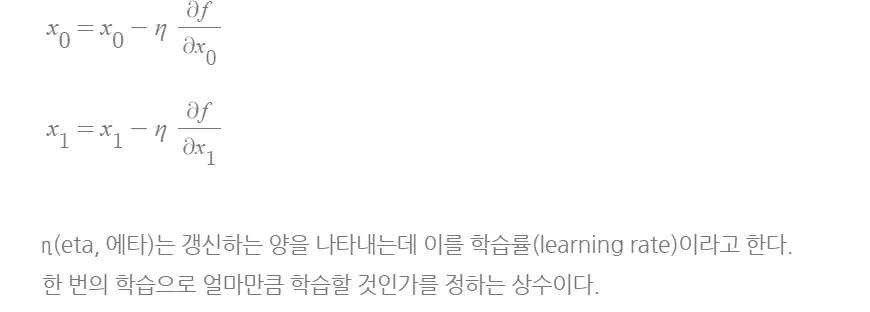

In [22]:
# 경사 하강법 구현
# f는 최적화하려는 함수, init_x: 초기값, lr:학습률
def gradient_descent(f, init_x, lr=0.01, step_num=100): 
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        
        grad = numerical_gradient(f,x)
        x -= lr * grad
    return x,np.array(x_history)

# 문제: 경사법으로 f(x0,x1) = x1**2 + x1**2의 최소값을 구하라
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
#gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=20)

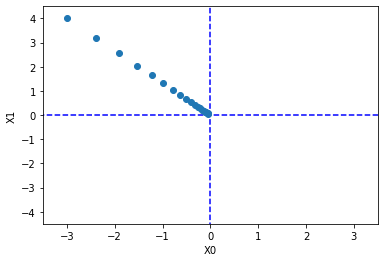

In [23]:
# 그림으로 나타내기
import numpy as np
import matplotlib.pylab as plt


lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


In [25]:
# 학습률은 너무 크거나 작으면 좋은 결과를 얻을 수 없음
# 학습률이 너무 큰 예 : lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=10)

(array([-2.58983747e+13, -1.29524862e+12]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [ 5.70000000e+01, -7.60000000e+01],
        [-1.08300000e+03,  1.44400000e+03],
        [ 2.05770000e+04, -2.74360000e+04],
        [-3.90963008e+05,  5.21284002e+05],
        [ 7.42829664e+06, -9.90439654e+06],
        [-1.41137328e+08,  1.88183103e+08],
        [ 2.68126267e+09, -3.57501690e+09],
        [-5.09763373e+10,  6.79001831e+10],
        [ 9.45170863e+11, -1.29524862e+12]]))

In [27]:
# 학습률이 너무 작은 예: lr = 1e-10
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=10)

(array([-2.99999999,  3.99999999]),
 array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999]]))

 - 신경망에서의 기울기
 
 신경망 학습에서도 기울기를 구해야한다. 이때 기울기는 가중치 매개변수에 대한 손실 함수의 기울기이다. 

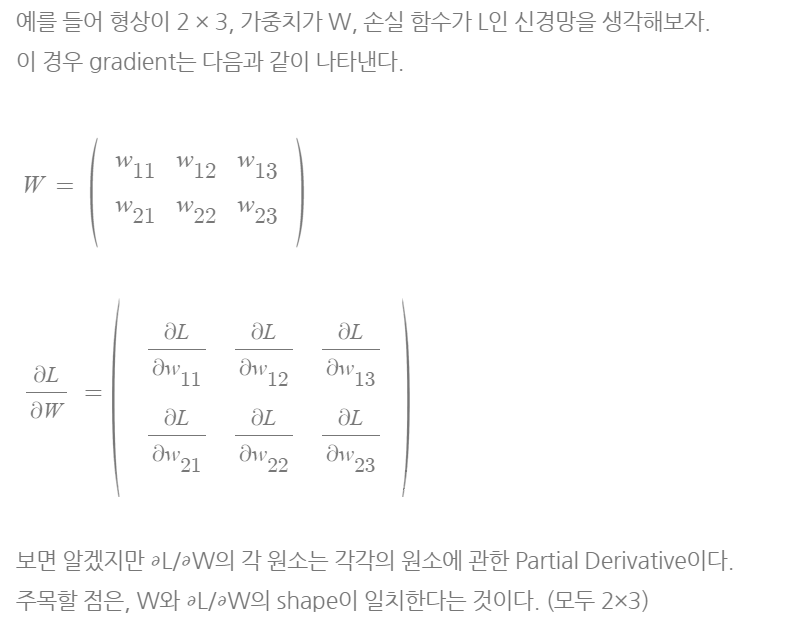

In [9]:
# 신경망을 예로 들어 실제 기울기를 구하는 코드 구현
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규 분포로 초기화
        
    def predict(self,x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss
    
net= simpleNet()
print(net.W) # 가중치 매개변수

x = np.array([0.6,0.9])
p = net.predict(x)

print(p)

np.argmax(p) # 최대값의 인덱스

t = np.array([0,0,1]) # 정답 레이블
net.loss(x,t)

[[-0.35403728 -0.79475355 -0.55637609]
 [ 2.0463445   0.26383245  0.93710514]]
[ 1.62928768 -0.23940292  0.50956897]


1.5122313067572588

In [12]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.40521434  0.06253495 -0.46774928]
 [ 0.6078215   0.09380242 -0.70162392]]


 numerical_gradient(f, x)의 인수 f는 function이고, x는 f의 인수이다.

그래서 위 코드에서는 net.W를 인수로 받고 손실 함수를 계산하는 새로운 function f(W)를 정의했다. 이후, 걔를 numerical_gradient에 넘겼다.


In [13]:
# 람다 기법을 써서 위 코드를 구현하면
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

 # 5. 학습 알고리즘 구현하기
 
 신경망 학습 절차는 다음과 같다.
 
 - 전제: 신경망에는 적응 가능한  가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다. 신경망 학습은 아래와 같이 4단계로 수행한다.
 
1. 미니배치 : 훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며 그 미니배치의 손실 함수 값을 줄이는 것이 목표이다.
2. 기울기 산출: 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.
3. 매개 변수 갱신 : 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.
4. 반복: 1~3 단계를 반복

위는 경사 하강법으로 매개변수를 갱신하는 방법이며 이때 데이터를 미니배치로 무작위로 선정하기 때문에 확률적 경사 하강법(SGD)라고 부르며 대부분의 딥러닝 프레임워크의 함수로써 이 기능을 구현하고 있다.

In [1]:
# 2층 신경망 클래스 구현하기
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [30]:
# params 와 grads 변수는 인스턴스 변수
# 예제
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape # (784, 100)
net.params['b1'].shape # (100,)
net.params['W2'].shape # (100, 10)
net.params['b2'].shape # (10,)

(10,)

In [31]:
# 예측 처리 실행
x = np.random.rand(100, 784) # 더미 입력 데이터 (100장 분량)
y = net.predict(x)

In [33]:
# grads 변수에는 params 변수에 대응되는 매개변수의 기울기가 저장됨
# numerical_gradient를 사용해 기울기를 계산하면 grads 변수에 기울기 값이 저장됨
x = np.random.rand(100, 784) # 더미 입력 데이터
t = np.random.rand(100,10) # 더미 입력 레이블

grads = net.numerical_gradient(x, t) # 기울기 계산

grads['W1'].shape # (784, 100)
grads['b1'].shape # (100,)
grads['W2'].shape # (100, 10)
grads['b2'].shape # (10,)

(10,)

In [ ]:
# 미니 배치 학습 구현
# TwoLayerNet 클래스와 MNIST 데이터 셋을 사용하여 학습을 수행해보자
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터 (학습률 같은 매개변수)
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1 
network = TwoLayerNet(input_size = 784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니 배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

- 시험 데이터로 평가하기

신경망 학습에서 훈련 데이터 외의 데이터를 올바르게 인식하는지를 확인해 한다. 이를 위해 아래의 구현에서 학습 도중 정기적으로 훈련 데이터와 시험 데이터를 대상으로 정확도를 기록한다. 여기어세 1에폭별로 훈련 데이터와 시험 데이터에 대한 정확도를 기록한다.

※ 여기서 에폭(epoch)은 하나의 단위이다. 1에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당한다. 예컨데 훈련 데이터 10,000개를 100개의 미니배치로 학습할 경우 확률 경사 하강법을 100회 반복하면 모든 훈련 데이터를 소진하게 된다. 이때 100회가 1 에폭이 된다.

In [ ]:
# 미니 배치 학습 구현
# TwoLayerNet 클래스와 MNIST 데이터 셋을 사용하여 학습을 수행해보자
# TwoLayerNet 클래스는 위에 찾아서 실행하면 된다.
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size = 784, hidden_size=50, output_size=10)

# 하이퍼파라미터 (학습률 같은 매개변수)
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1 

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1 에폭당 반복수
iter_per_epoch = max(train_size / batch_size, 1)


for i in range(iters_num):
    # 미니 배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1 에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc:" + str(train_acc) + "," + str(test_acc))

train acc, test acc:0.10218333333333333,0.101


In [ ]:
# 그래프 그리기
import numpy as np
import matplotlib.pylab as plt

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

 # 이 장에서 배운 내용
 
  - 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용한다.
  - 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
  - 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
  - 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
  - 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분으로 한다.
  - 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
  - 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다. 다음 장에서 구현하는 오차역전파법은 기울기를 고속으로 구할 수 있다.